## To be, or not to be

### Introduction
The project is about building one or more classification models to determine the player using the other columns as features. The dataset contains all of Shakespeare's plays.The player is going to be classified based on the play, ActSceneLine and the PlayerLine.

The data was obatined from the following link:

https://www.kaggle.com/kingburrito666/shakespeare-plays

The data contains one csv file "Shakespaeare_data.csv".


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

* First we are going to load the data set to a dataframe using pandas

In [2]:
data_frame=pd.read_csv('Data/Shakespeare_data.csv')
data_frame.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
Dataline            111396 non-null int64
Play                111396 non-null object
PlayerLinenumber    111393 non-null float64
ActSceneLine        105153 non-null object
Player              111389 non-null object
PlayerLine          111396 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


* Here we are going to replace the missing values in player with "Other" and replace all the other rows with missing values.

In [4]:
data_frame['Player'].replace(np.nan, 'Other',inplace = True)
data_frame=data_frame.dropna()
data_frame.reset_index(drop=True,inplace=True)

In [5]:
#data_frame.iloc[[0,1,2,2015,2016,29459,29460],:]

Now i am going to replace all the players given by NaN to "Other".

Now i will try to find the number of plays and the number of players for each play.
First to calculate the number of plays the following code was used:

In [6]:
print('Number of unique plays = '+str(data_frame['Play'].nunique()))

Number of unique plays = 36


* Printing all unique plays:

In [7]:
pd.DataFrame(data_frame['Play'].unique().tolist(), columns=['Play Name'])

,Play Name
0,Henry IV
1,Henry VI Part 1
2,Henry VI Part 2
3,Henry VI Part 3
4,Alls well that ends well
5,As you like it
6,Antony and Cleopatra
7,A Comedy of Errors
8,Coriolanus
9,Cymbeline


### Number of lines each player has in a play

In [8]:
data_frame.groupby(['Play', 'Player']).count()['Dataline']

Play                      Player            
A Comedy of Errors        ADRIANA               276
                          AEGEON                147
                          AEMELIA                73
                          ANGELO                 96
                          ANTIPHOLUS              6
                          BALTHAZAR              31
                          Courtezan              40
                          DROMIO OF EPHESUS     187
                          DROMIO OF SYRACUSE    314
                          DUKE SOLINUS           93
                          First Merchant         18
                          Gaoler                  1
                          LUCE                   11
                          LUCIANA               108
                          OF EPHESUS            210
                          OF SYRACUSE           271
                          Officer                16
                          PINCH                  16
                   

### Number of lines each player has in a play

In [9]:
numberofPlayers = data_frame.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame()
numberofPlayers['Play'] = numberofPlayers.index.tolist()
numberofPlayers.columns = ['Number of Players','Play']
numberofPlayers.index= np.arange(0,len(numberofPlayers))
numberofPlayers

,Number of Players,Play
0,70,Richard III
1,65,Henry VI Part 2
2,61,Coriolanus
3,55,Timon of Athens
4,54,Antony and Cleopatra
5,52,Henry VI Part 1
6,50,Julius Caesar
7,48,Pericles
8,47,Henry V
9,47,Henry VIII


### Number of lines in each play and the number of playerline numbers

In [10]:
grouped=data_frame.groupby('Play')
print(grouped.sum())

                           Dataline  PlayerLinenumber
Play                                                 
A Comedy of Errors         46131601           70991.0
A Midsummer nights dream  147312925           79340.0
A Winters Tale            368862156          178805.0
Alls well that ends well   41531650          100758.0
Antony and Cleopatra       73000741          103275.0
As you like it             45906668           86091.0
Coriolanus                 99773035          127809.0
Cymbeline                 114455004          123967.0
Hamlet                    138866798          186894.0
Henry IV                    4841412          105385.0
Henry V                   124054631           71040.0
Henry VI Part 1            13042497           45090.0
Henry VI Part 2            24548462           84495.0
Henry VI Part 3            32561494           68701.0
Henry VIII                136983959           95818.0
Julius Caesar             123694347          100015.0
King John                 11

### Graph of the number of players per each play

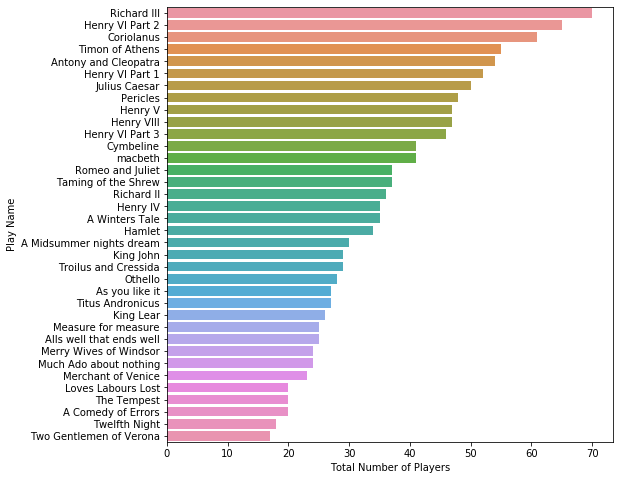

In [11]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x='Number of Players',y='Play',data=numberofPlayers)
ax.set(xlabel='Total Number of Players', ylabel='Play Name')
plt.show()

### Number of lines for each player

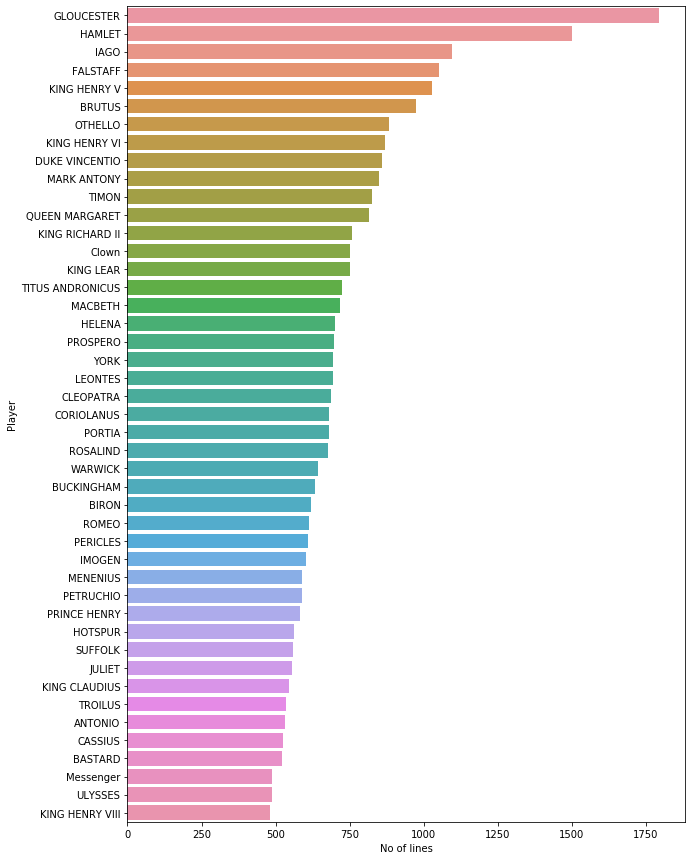

In [12]:
numberoflines = data_frame.groupby(['Player'])['PlayerLine'].nunique().sort_values(ascending= False).to_frame()
numberoflines['Player'] = numberoflines.index.tolist()
numberoflines.columns = ['Number of lines','Player']
numberoflines.index= np.arange(0,len(numberoflines))
plt.figure(figsize=(10,15))
ax = sns.barplot(x='Number of lines',y='Player',data=numberoflines.head(45))
ax.set(xlabel='No of lines', ylabel='Player')
plt.show()

### Number of lines spoken per player in each play

In [13]:
#Number of lines spoken per player in each play
lines_per_player= data_frame.groupby(['Play','Player']).count()['PlayerLine']
lines_per_player= lines_per_player.to_frame()
lines_per_player

PlayerLine
Play                     Player                        
A Comedy of Errors       ADRIANA                    276
                         AEGEON                     147
                         AEMELIA                     73
                         ANGELO                      96
                         ANTIPHOLUS                   6
                         BALTHAZAR                   31
                         Courtezan                   40
                         DROMIO OF EPHESUS          187
                         DROMIO OF SYRACUSE         314
                         DUKE SOLINUS                93
                         First Merchant              18
                         Gaoler                       1
                         LUCE                        11
                         LUCIANA                    108
                         OF EPHESUS                 210
                         OF SYRACUSE                271
                         Officer                     16
                         PINCH                       16
                         Second Merchant             38
                         Servant                     15
A Midsummer nights dream ALL                          2
                         BOTTOM                     204
                         COBWEB                       4
                         DEMETRIUS                  134
                         EGEUS                       41
                         FLUTE                       23
                         Fairy                       31
                         HELENA                     229
                         HERMIA                     165
                         HERNIA                       1
...                                                 ...
macbeth                  First Murderer              30
                         First Witch                 63
                         Gentlewoman                 23
                         HECATE                      41
                         LADY MACBETH               265
                         LADY MACDUFF                41
                         LENNOX                      74
                         Lord                        21
                         Lords                        3
                         MACBETH                    718
                         MACDUFF                    180
                         MALCOLM                    212
                         MENTEITH                    12
                         Messenger                   23
                         Old Man                     11
                         Porter                      46
                         ROSS                       135
                         SEYTON                       5
                         SIWARD                      30
                         Second Apparition            4
                         Second Murderer             15
                         Second Witch                27
                         Sergeant                    35
                         Servant                      5
                         Soldiers                     1
                         Son                         20
                         Third Apparition             5
                         Third Murderer               8
                         Third Witch                 27
                         YOUNG SIWARD                 7

[1303 rows x 1 columns]

## Feature Engineering

In [14]:
data_frame.head(20)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
1,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
2,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
3,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
4,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil
5,9,Henry IV,1.0,1.1.6,KING HENRY IV,Shall daub her lips with her own children's bl...
6,10,Henry IV,1.0,1.1.7,KING HENRY IV,"Nor more shall trenching war channel her fields,"
7,11,Henry IV,1.0,1.1.8,KING HENRY IV,Nor bruise her flowerets with the armed hoofs
8,12,Henry IV,1.0,1.1.9,KING HENRY IV,"Of hostile paces: those opposed eyes,"
9,13,Henry IV,1.0,1.1.10,KING HENRY IV,"Which, like the meteors of a troubled heaven,"


In [15]:
data_frame.loc[10]['PlayerLine']

'All of one nature, of one substance bred,'

* We notice that there is a lot of Uppercase characters and punctutation symbols and we need to remove all that using the following commands:

In [16]:
data_frame['PlayerLineLower']=data_frame['PlayerLine'].str.lower()
punctuation_signs = list("?:!.,;")
data_frame['PlayerLineNew'] = data_frame['PlayerLineLower']

for punct_sign in punctuation_signs:
    data_frame['PlayerLineNew'] = data_frame['PlayerLineNew'].str.replace(punct_sign, '')
data_frame['PlayerLineNew'] = data_frame['PlayerLineNew'].str.replace("'s", "")

### Word Lemmatization

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yousif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yousif\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Saving the lemmatizer into an object and iterating through each word
wordnet_lemmatizer = WordNetLemmatizer()
#In order to lemmatize, we have to iterate through every word:

nrows = len(data_frame)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = data_frame.loc[row]['PlayerLineNew']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [19]:
data_frame['PlayerLineFinal']=lemmatized_text_list

### Word Tokenization

In [20]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yousif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [22]:
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    data_frame['PlayerLineFinal'] = data_frame['PlayerLineFinal'].str.replace(regex_stopword, '')


In [23]:
data_frame['Word_tokens']=data_frame['PlayerLineFinal'].apply(lambda x:' '.join(w for w in nltk.word_tokenize(x.lower().strip()) if not w in stop_word) )
data_frame.Word_tokens.head()

0                           shake wan care
1              find time fright peace pant
2    breathe short-winded accent new broil
3              commence strand afar remote
4                    thirsty entrance soil
Name: Word_tokens, dtype: object

In [24]:
data_play_content=pd.DataFrame(data_frame.groupby('Player')['Word_tokens'].apply(lambda x: "{%s}" % ', '.join(x)))
data_play_content.head()

,Word_tokens
Player,
A Lord,{sir}
A Patrician,"{man marr fortune, nobler, ay burn}"
A Player,"{please lordship accept duty, think was soto h..."
AARON,"{climbeth tamora olympus top, safe fortune sho..."
ABERGAVENNY,"{can not tell, heaven hath give -- let graver ..."


### Plotting the wordclous for a sample of 5 players

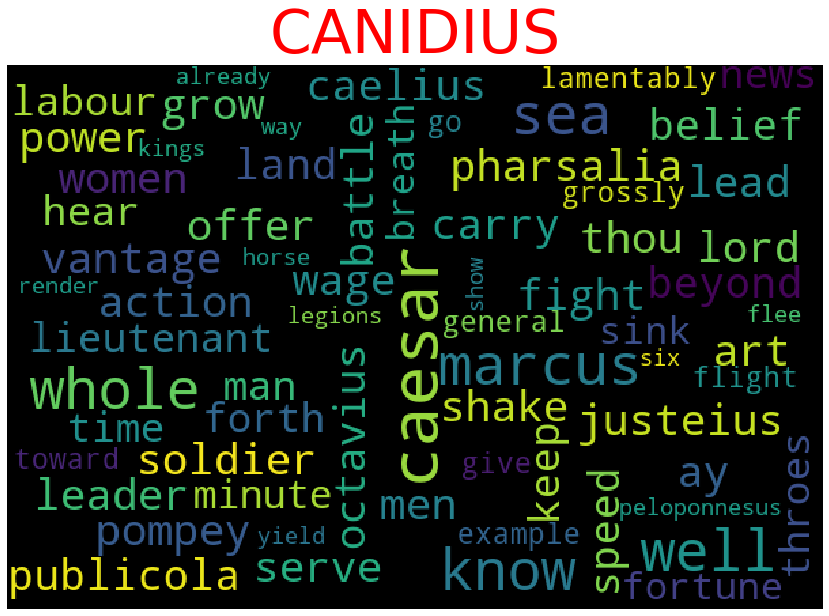

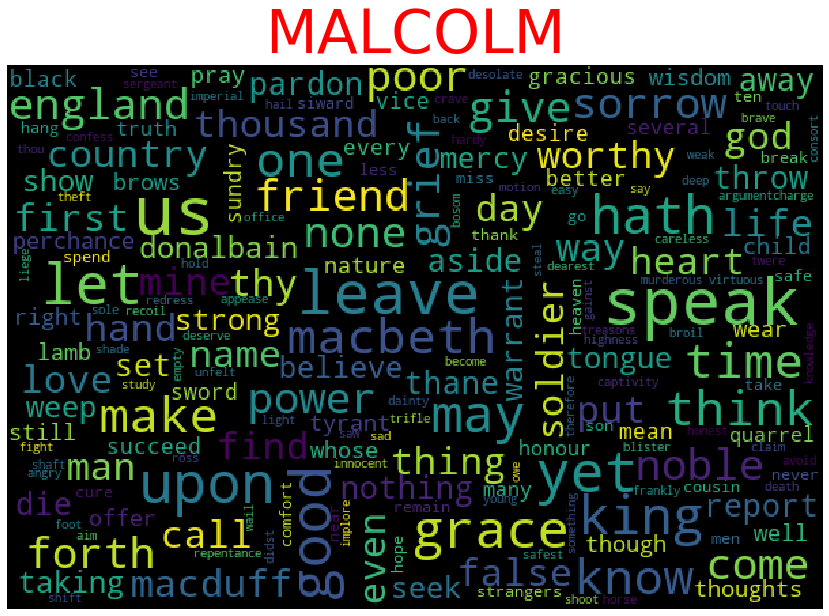

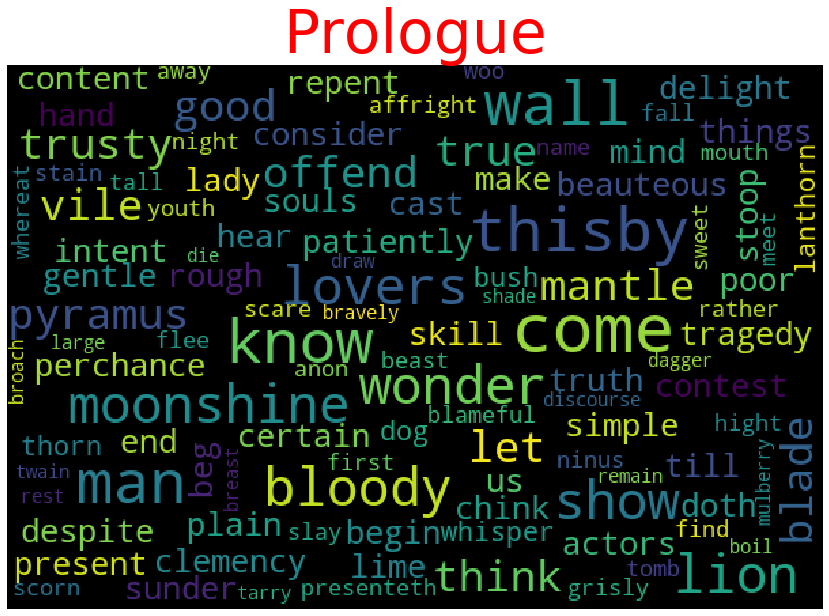

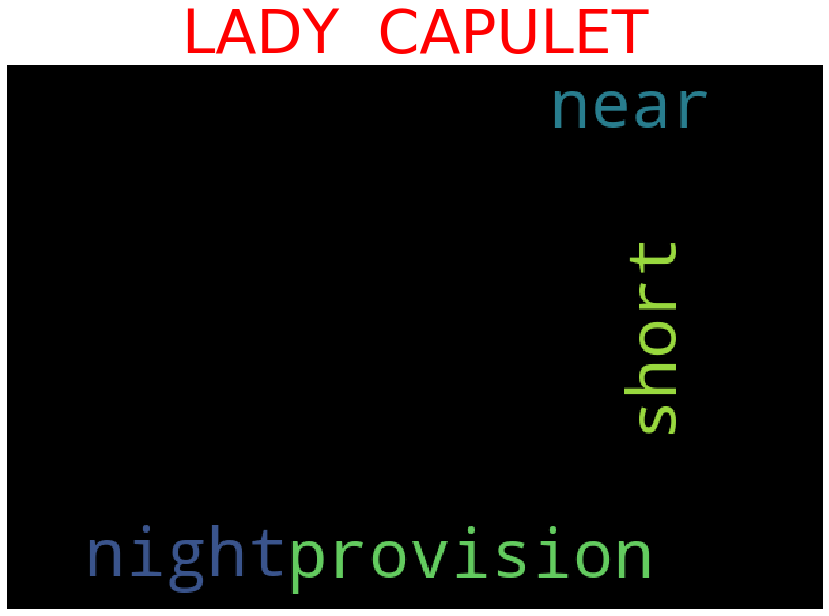

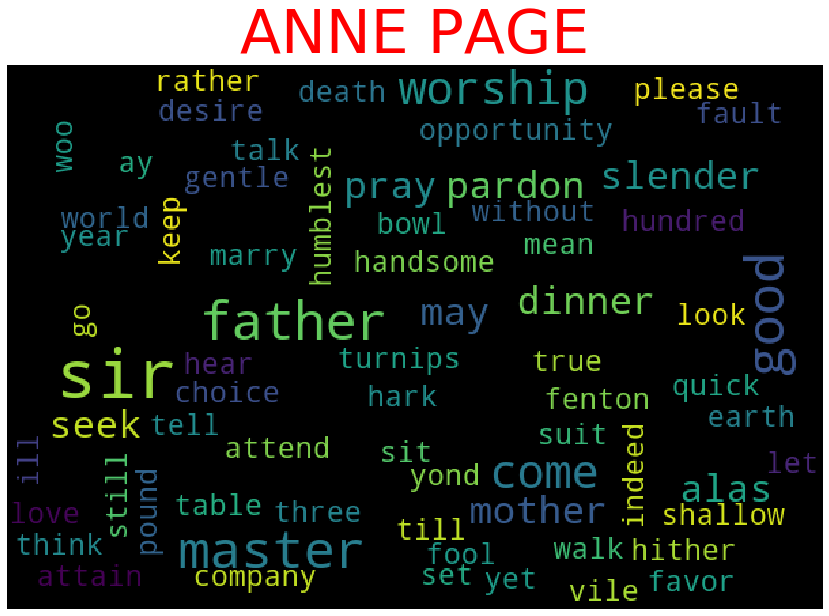

In [25]:
def WordCloudGeneration(str1,title):
    plt.figure(figsize=(20, 10))

    wordcloudoflines = WordCloud( background_color='black',width=600, height=400, max_font_size=50).generate(str1)
    wordcloudoflines.recolor(random_state=0)
    plt.title(title, fontsize=60,color='red')
    plt.imshow(wordcloudoflines)
    plt.axis('off')
    plt.show()
    
for cols in data_play_content.sample(5).index:
    WordCloudGeneration(data_play_content.loc[cols,'Word_tokens'],cols)

In [26]:
data_frame.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,PlayerLineLower,PlayerLineNew,PlayerLineFinal,Word_tokens
0,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,","so shaken as we are, so wan with care,",so shaken as we are so wan with care,shake wan care,shake wan care
1,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,","find we a time for frighted peace to pant,",find we a time for frighted peace to pant,find time fright peace pant,find time fright peace pant
2,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,and breathe short-winded accents of new broils,and breathe short-winded accents of new broils,breathe short-winded accent new broil,breathe short-winded accent new broil
3,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,to be commenced in strands afar remote.,to be commenced in strands afar remote,commence strand afar remote,commence strand afar remote
4,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,no more the thirsty entrance of this soil,no more the thirsty entrance of this soil,thirsty entrance soil,thirsty entrance soil


* Here we are going to drop unecessary columns in the data frame

In [27]:
data_frame.drop(columns=["PlayerLineLower","PlayerLineNew"],inplace=True)

In [28]:
data_frame.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,PlayerLineFinal,Word_tokens
0,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",shake wan care,shake wan care
1,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",find time fright peace pant,find time fright peace pant
2,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,breathe short-winded accent new broil,breathe short-winded accent new broil
3,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,commence strand afar remote,commence strand afar remote
4,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,thirsty entrance soil,thirsty entrance soil


* Now we are going to provide labels for all our text columns

In [29]:
players = data_frame.Player.unique()
i=0
Player_codes = dict()
for player in players:
    Player_codes[player]=i
    i+=1
plays = data_frame.Play.unique()
j=0
Play_codes = dict()
for play in plays:
    Play_codes[play]=j
    j+=1    
PlayerLinenumbers = data_frame.PlayerLinenumber.unique()
k=0.05
PlayerLinenumber_codes = dict()
for PlayerLinenumber in PlayerLinenumbers:
    PlayerLinenumber_codes[PlayerLinenumber]=k
    k+=2
    

ActSceneLines = data_frame.ActSceneLine.unique()
j=0
ActSceneLine_codes = dict()
for ActSceneLine in ActSceneLines:
    ActSceneLine_codes[ActSceneLine]=j
    j=j+1

* Now we are going to assign this back to our dataframe

In [30]:
data_frame['Player_code'] = data_frame['Player']
data_frame = data_frame.replace({'Player_code':Player_codes})
data_frame['Play_code'] = data_frame['Play']
data_frame = data_frame.replace({'Play_code':Play_codes})
data_frame['PlayerLinenumber_code'] = data_frame['PlayerLinenumber']
data_frame = data_frame.replace({'PlayerLinenumber_code':PlayerLinenumber_codes})
data_frame['ActSceneLine_code'] = data_frame['ActSceneLine']
data_frame = data_frame.replace({'ActSceneLine_code':ActSceneLine_codes})

In [31]:
data_frame.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,PlayerLineFinal,Word_tokens,Player_code,Play_code,PlayerLinenumber_code,ActSceneLine_code
0,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",shake wan care,shake wan care,0,0,0.05,0
1,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",find time fright peace pant,find time fright peace pant,0,0,0.05,1
2,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,breathe short-winded accent new broil,breathe short-winded accent new broil,0,0,0.05,2
3,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,commence strand afar remote,commence strand afar remote,0,0,0.05,3
4,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,thirsty entrance soil,thirsty entrance soil,0,0,0.05,4


### TF_ID Vectorization

In [32]:
ngram_range = (1,2)
#ignoring terms that appear in less than 5 docs
min_df = 5
#ignoring terms that appear in more than 50% of docs
max_df = 0.50
max_features = 100
tfidf = TfidfVectorizer(encoding='utf-8', ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True )
                        
features_train = tfidf.fit_transform(data_frame.PlayerLineFinal).toarray()
print(features_train.shape)

(105153, 100)


* Now we are going to split the dataset to train and test sets

In [34]:
vecdf = pd.DataFrame(features_train) 
vecdf['Playcode'] = data_frame['Play_code']
vecdf['ActSceneLine_code'] = data_frame['ActSceneLine_code']
vecdf['PlayerLinenumber_code'] = data_frame['PlayerLinenumber_code']
X = np.asarray(vecdf)
y = np.asarray(data_frame['Player_code'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(84122, 103) (84122,)
(21031, 103) (21031,)


### Decision Tree Classification

In [38]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for dataset
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.74


### K-nearest Neighbour Classifier

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on test set: 0.65


### Naive Bayes Classifier

In [40]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print('Accuracy of Naive bayes classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of Naive bayes classifier on test set: 0.65
